<a href="https://colab.research.google.com/github/joseph15paul/Playground/blob/master/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [86]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (2).xlsx


#creating a dataframe from the file

In [6]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')


In [ ]:
#displaying first 5 rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#displaying last 5 rows
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#checking types of data and summary stats

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Experience has negative values, so that coloumn must have faulty data.

#2. Removing redundant coloumns
some coloumns like ID won't provide any relevant information that we can use.

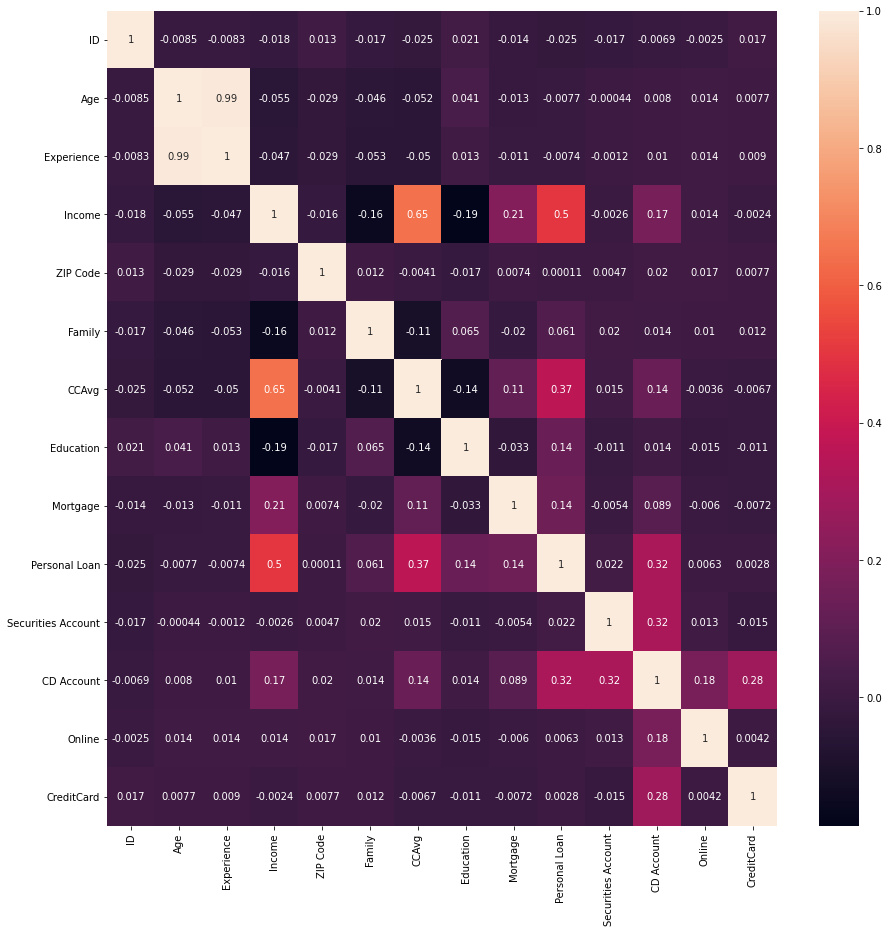

In [ ]:

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot=True,ax =ax)
plt.show()

Age and Experience has high correlation, so we can treat those both as same and since experience has faulty data we can just drop that coloumn.

In [7]:
df = df.drop(columns=['ID', 'Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


#EDA

In [9]:
#Number of unique in each column
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Zip code could have been useful as a categorical column if it had lower number of unique values which would have meant fewer locations of interest. But since it has 467 unique values we can drop that column.

In [ ]:
df=df.drop("ZIP Code",axis = 1)

In [13]:
#Number of people with zero mortgage
#since out of 5000 accounts 3462 has mortgage, the data is skewed
(df['Mortgage'] == 0).sum()

3462

In [14]:
#Number of people with zero credit card spending per month
(df['CCAvg'] == 0).sum()

106

In [24]:
#Value counts of all categorical columns (coloumns with low number of unique values)
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [20]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [21]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [22]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [23]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [25]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

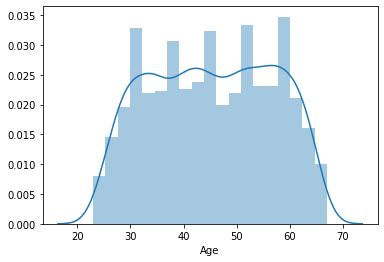

In [26]:
#Univariate analysis
sns.distplot(df['Age'])

#age seems to have a normal symmetric distribution and has little outliers

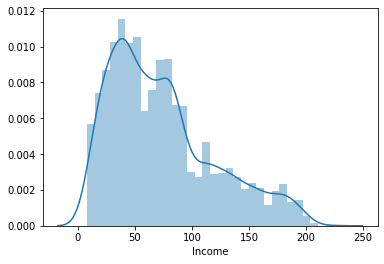

In [27]:
sns.distplot(df['Income'])
#Income coloumn has skewed data

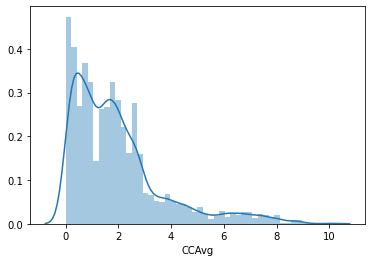

In [46]:
sns.distplot(df['CCAvg'])
#skewed

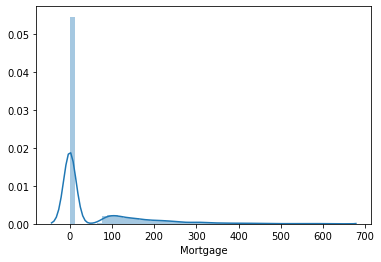

In [29]:
sns.distplot(df['Mortgage'])
#highly skewed

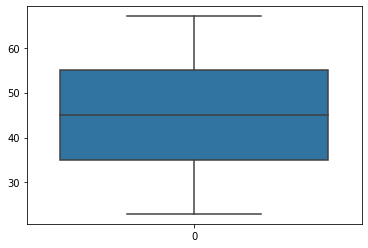

In [32]:
sns.boxplot(data = df['Age'])
#interquartile range of age is from 35 to 55.

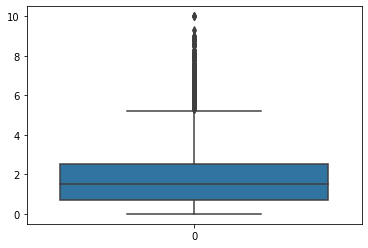

In [33]:
sns.boxplot(data = df['CCAvg'])
#many outliers above 5

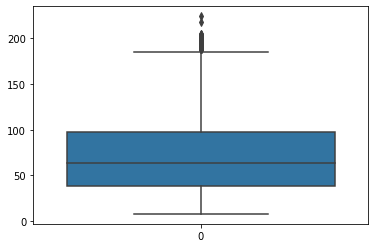

In [34]:
sns.boxplot(data = df['Income'])


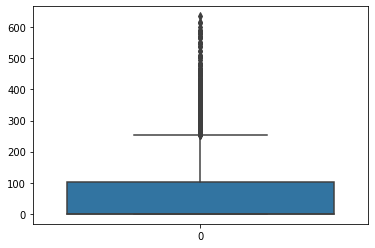

In [35]:
sns.boxplot(data = df['Mortgage'])


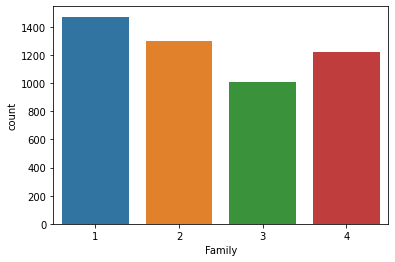

In [38]:
sns.countplot(df.Family)


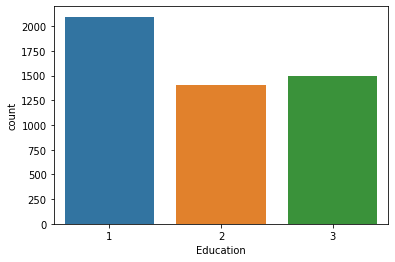

In [39]:
sns.countplot(df.Education)

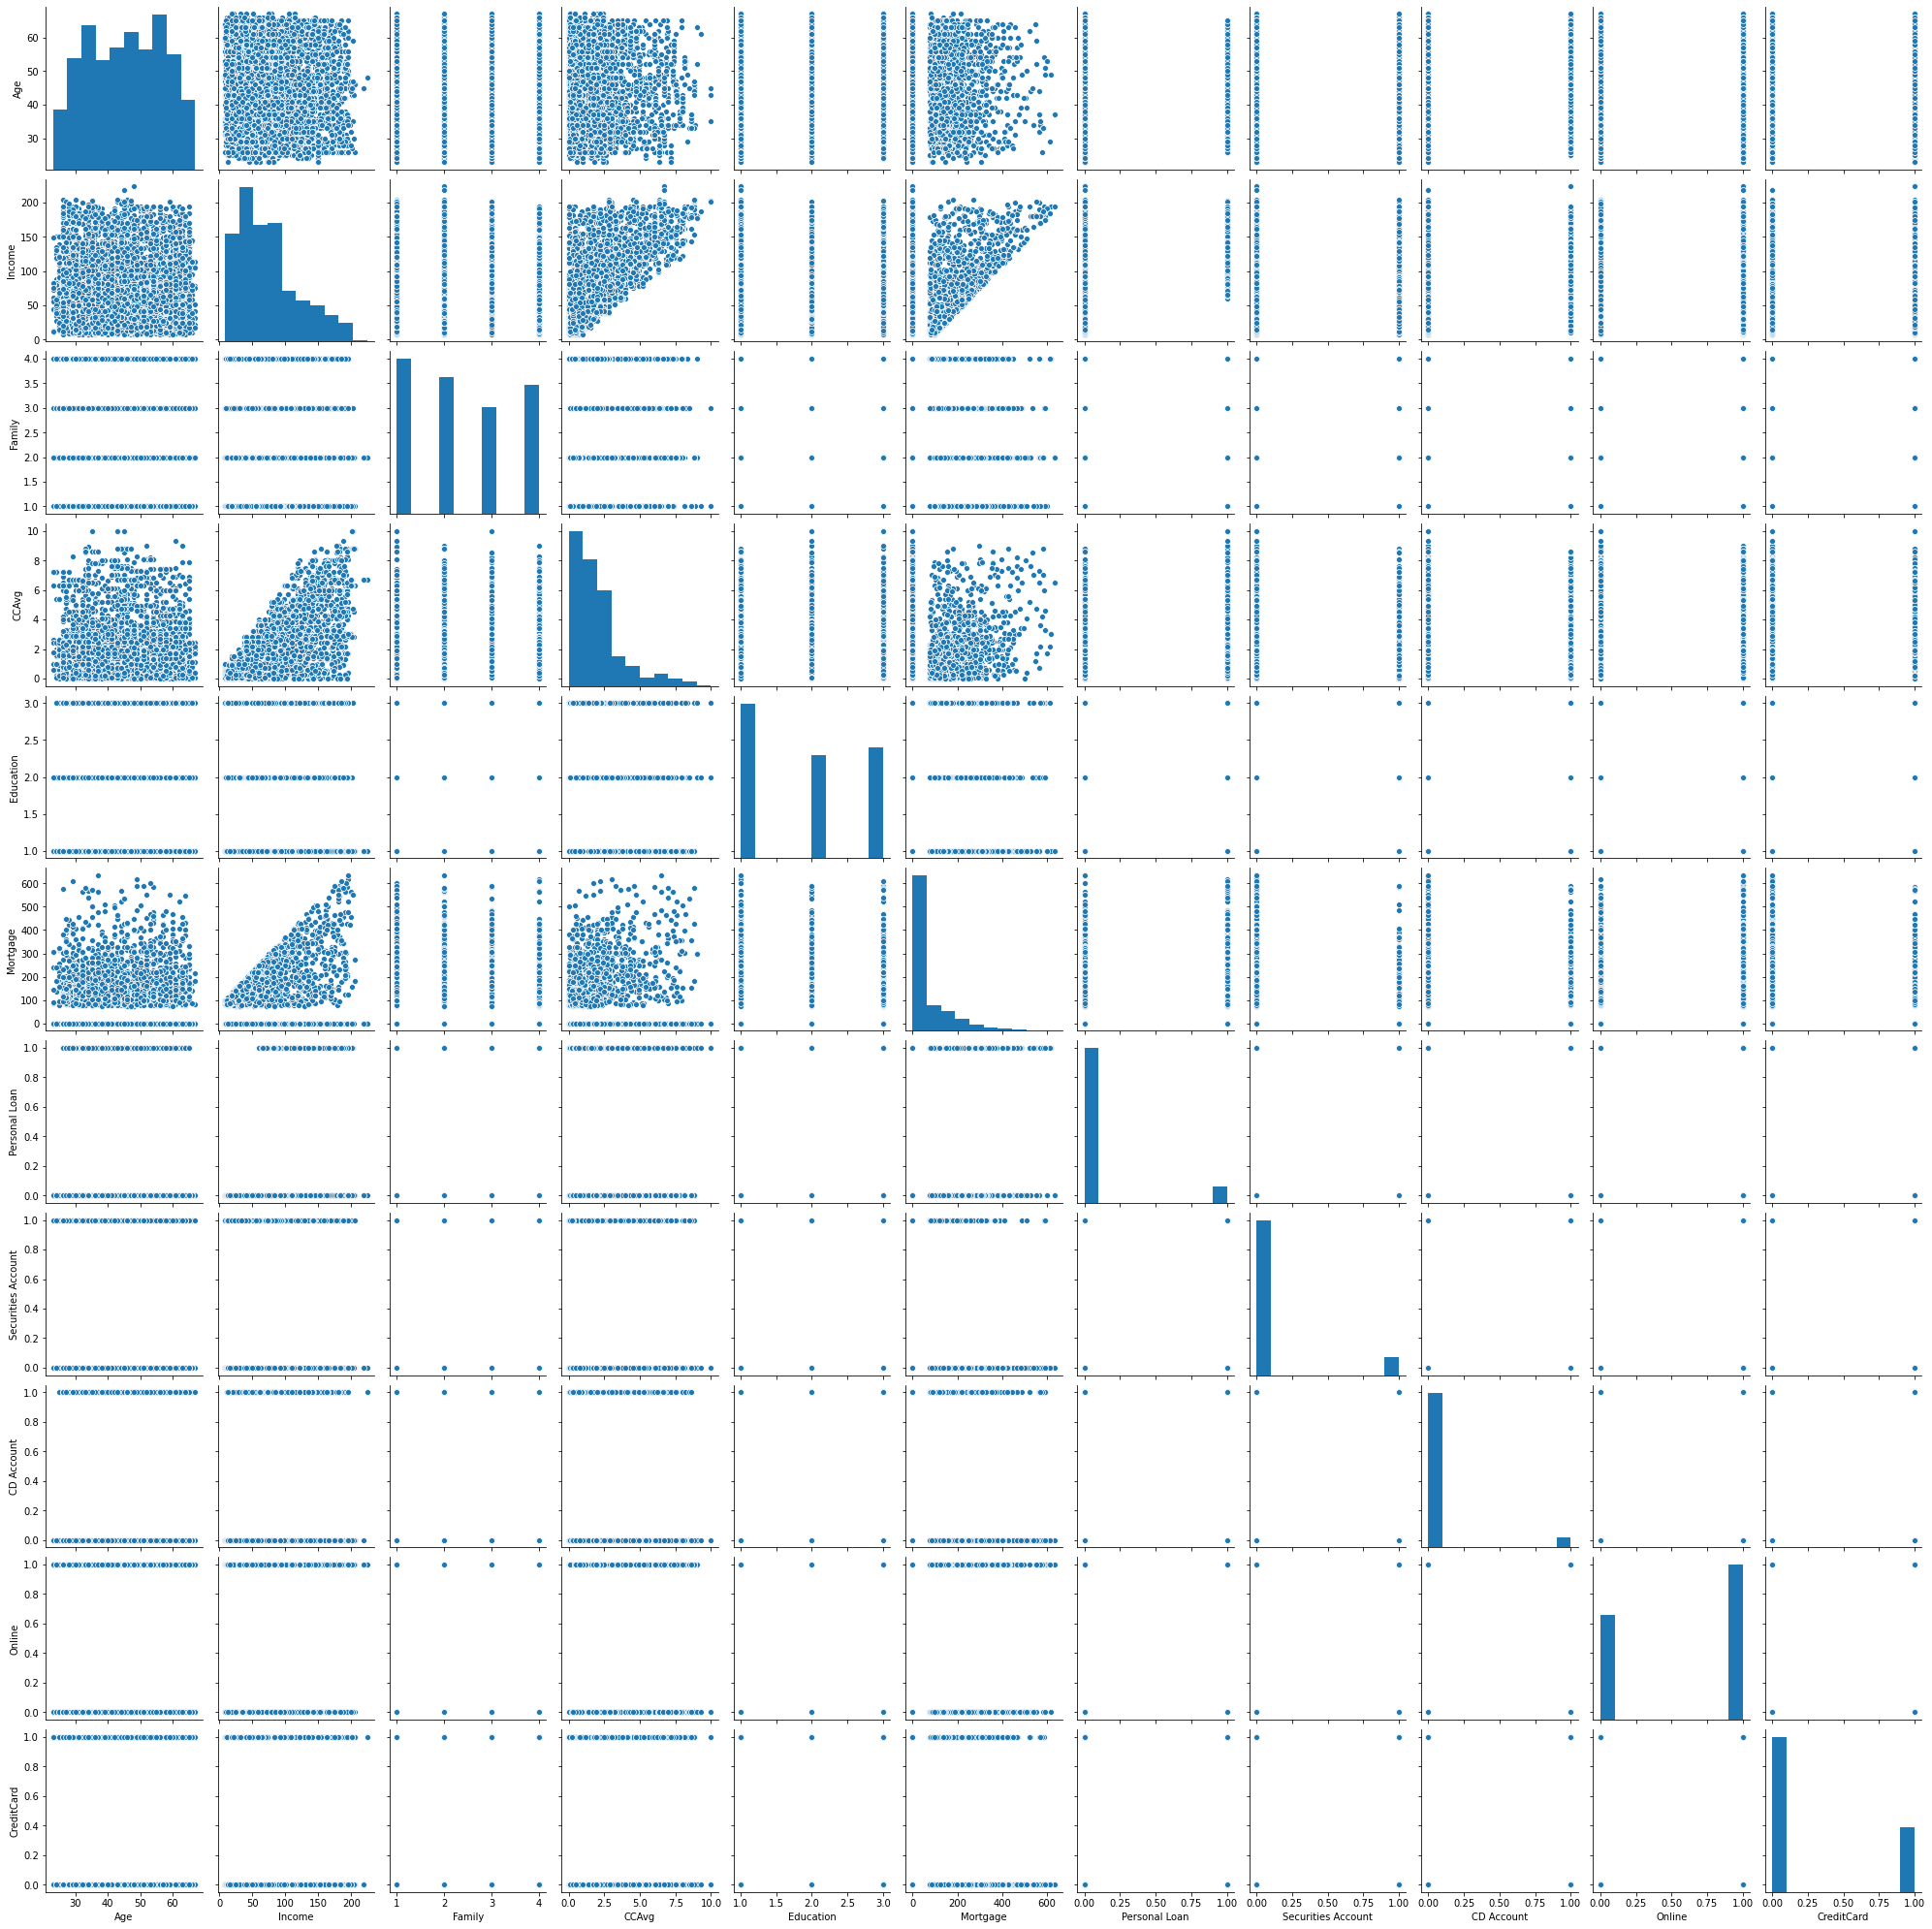

In [49]:
#Bivariate analysis
sns.pairplot(df)

#CCAvg and Mortgage increase with income

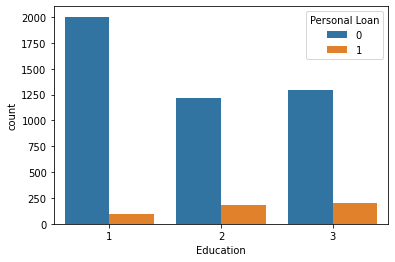

In [62]:
sns.countplot(x = 'Education',data = df,hue=df['Personal Loan'])
#most people with lower education don't have personal loan

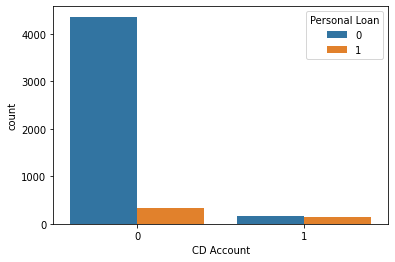

In [68]:
sns.countplot(x = 'CD Account',data = df,hue=df['Personal Loan'])
# about 45% of people with CD account has a personal loan

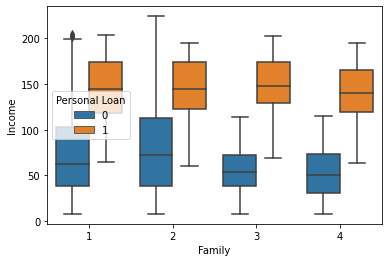

In [78]:
sns.boxplot(x= 'Family',y = 'Income', data = df, hue = 'Personal Loan')
#people with more income take more personal loans

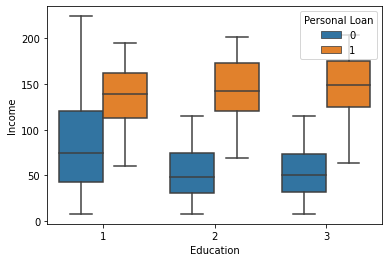

In [84]:
sns.boxplot(x= 'Education',y = 'Income', data = df, hue = 'Personal Loan')

#Applying necessary transformations for the feature variables